In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 89.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [3]:
data = pd.read_csv('/content/concrete.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
regression = setup(train_data, target='strength', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,8420
1,Target,strength
2,Target type,Regression
3,Original data shape,"(927, 9)"
4,Transformed data shape,"(927, 9)"
5,Transformed train set shape,"(648, 9)"
6,Transformed test set shape,"(279, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3228,21.5585,4.6072,0.9186,0.1531,0.1172,0.0700
xgboost,Extreme Gradient Boosting,3.1656,22.1038,4.6518,0.9163,0.1556,0.1140,0.2470
catboost,CatBoost Regressor,3.5313,22.9600,4.7399,0.9144,0.1561,0.1240,8.8530
et,Extra Trees Regressor,3.2996,23.5750,4.8243,0.9113,0.1608,0.1198,0.2880
rf,Random Forest Regressor,3.6597,25.5392,5.0223,0.9039,0.1722,0.1347,0.3470
gbr,Gradient Boosting Regressor,3.8258,26.0412,5.0607,0.9011,0.1715,0.1401,0.1590
dt,Decision Tree Regressor,4.6653,46.6324,6.7507,0.8201,0.2335,0.1722,0.0260
ada,AdaBoost Regressor,6.2317,56.3226,7.4574,0.7890,0.2828,0.2668,0.1280
knn,K Neighbors Regressor,7.2487,92.0589,9.5420,0.6509,0.3216,0.2855,0.0320
br,Bayesian Ridge,8.3407,111.0256,10.5193,0.5784,0.3464,0.3325,0.0190


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [6]:
final_model = finalize_model(best)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Cement (component 1)(kg in a m^3 '
                                             'mixture)',
                                             'Blast Furnace Slag (component '
                                             '2)(kg in a m^3 mixture)',
                                             'Fly Ash (component 3)(kg in a '
                                             'm^3 mixture)',
                                             'Water  (component 4)(kg in a m^3 '
                                             'mixture)',
                                             'Superplasticizer (component '
                                             '5)(kg in a m^3 mixture)',
                                             'Coarse Aggregate  (component '
                                             '6)(kg in a m^3 mixture)',
                                             'Fine Aggregate 

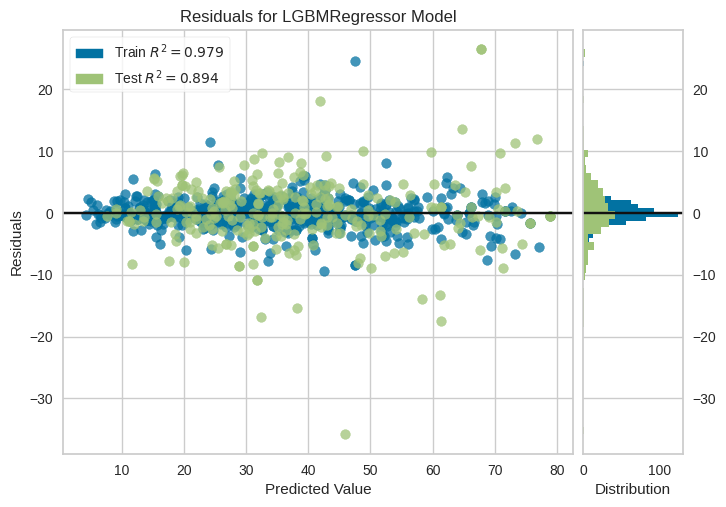

In [7]:
plot_model(best, plot = 'residuals')

In [8]:
predictions = predict_model(final_model, data=test_data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.9890,17.1075,4.1361,0.9357,0.1332,0.1069


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength,prediction_label
31,266.000000,114.0,0.0,228.000000,0.0,932.000000,670.000000,365,52.910000,51.319605
109,362.600006,189.0,0.0,164.899994,11.6,944.700012,755.799988,7,55.900002,47.088504
136,389.899994,189.0,0.0,145.899994,22.0,944.700012,755.799988,28,74.500000,72.710960
88,362.600006,189.0,0.0,164.899994,11.6,944.700012,755.799988,3,35.299999,32.942744
918,145.000000,0.0,179.0,202.000000,8.0,824.000000,869.000000,28,10.540000,11.672351
